In [1]:
import pandas as pd
from scipy.io import loadmat
import numpy as np
from pathlib import Path

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
pd.options.display.max_rows = 10
pd.options.display.max_columns = 100

Data is provided in matlab files .mat

They are deeply nested structures that contain data and metadata about the whole mast. Have to suss all this out...

In [3]:
big = Path('../data/raw/12_17_2019_11_00_00_000.mat') # large file, 4.6 MB
big.exists()

True

In [4]:
small = Path('../data/raw/03_03_2019_11_00_00_000.mat') # small file, 1.0 MB
small.exists()

True

In [5]:
dfb = loadmat(big, squeeze_me=True)

In [6]:
dfs = loadmat(small, squeeze_me=True)

In [7]:
top_keys = {key : dfb[key].dtype.names for key in dfb.keys() if not key.startswith('__')}
top_keys

{'Sonic_x_119': ('val', 'label', 'units', 'height'),
 'Sonic_y_119': ('val', 'label', 'units', 'height'),
 'Sonic_z_119': ('val', 'label', 'units', 'height'),
 'Sonic_Temp_119': ('val', 'label', 'units', 'height'),
 'Sonic_x_100': ('val', 'label', 'units', 'height'),
 'Sonic_y_100': ('val', 'label', 'units', 'height'),
 'Sonic_z_100': ('val', 'label', 'units', 'height'),
 'Sonic_Temp_100': ('val', 'label', 'units', 'height'),
 'Sonic_x_74': ('val', 'label', 'units', 'height'),
 'Sonic_y_74': ('val', 'label', 'units', 'height'),
 'Sonic_z_74': ('val', 'label', 'units', 'height'),
 'Sonic_Temp_74': ('val', 'label', 'units', 'height'),
 'Sonic_x_61': ('val', 'label', 'units', 'height'),
 'Sonic_y_61': ('val', 'label', 'units', 'height'),
 'Sonic_z_61': ('val', 'label', 'units', 'height'),
 'Sonic_Temp_61': ('val', 'label', 'units', 'height'),
 'Sonic_x_41': ('val', 'label', 'units', 'height'),
 'Sonic_y_41': ('val', 'label', 'units', 'height'),
 'Sonic_z_41': ('val', 'label', 'units', 'he

In [8]:
dfb['Sonic_x_119']

array((array([ 8.18,  8.03,  7.88, ..., 11.  , 11.13, 11.04]), 'Sonic x velocity (119 m)', 'm/s', 119),
      dtype=[('val', 'O'), ('label', 'O'), ('units', 'O'), ('height', 'O')])

In [9]:
dfb['Sonic_x_119']['val'].item().shape

(12000,)

In [10]:
channel_meta = pd.DataFrame({key: [dfb[key][val_i].item() for val_i in val if val_i != 'val'] for key, val in top_keys.items() if key not in {'tower', 'datastream'}},
                           index=['label', 'units', 'height']).T
channel_meta

,label,units,height
Sonic_x_119,Sonic x velocity (119 m),m/s,119
Sonic_y_119,Sonic y velocity (119 m),m/s,119
Sonic_z_119,Sonic z velocity (119 m),m/s,119
Sonic_Temp_119,Sonic temperature (119 m),°C,119
Sonic_x_100,Sonic x velocity (100 m),m/s,100
...,...,...,...
Sonic_dt_rotated_15m,Sonic dt rotated (15 m),s,15
Sonic_u_15m,Sonic u (15 m),m/s,15
Sonic_v_15m,Sonic v (15 m),m/s,15
Sonic_w_15m,Sonic w (15 m),m/s,15


In [11]:
dfb['datastream'] # lots of metadata

array([array([], dtype=float64), array([], dtype=float64),
       array([], dtype=float64), array([], dtype=float64),
       array([], dtype=float64),
       array((array((119, 0, 278),
      dtype=[('height', 'O'), ('boomlength', 'O'), ('inflow', 'O')]), array((array([2011,    4,    1,    0,    0,    0], dtype=uint16), 'XXXXXXXXX', 'Sonic x velocity', 'Sonic_x_119', '119m_U', 'velocity', 'm/s', -99999),
      dtype=[('installdate', 'O'), ('serialno', 'O'), ('name', 'O'), ('variable', 'O'), ('TDMSchanName', 'O'), ('measures', 'O'), ('units', 'O'), ('nanvalue', 'O')]), array((1, array((35.05, -35.05, 0.99),
      dtype=[('max', 'O'), ('min', 'O'), ('rate', 'O')]), array((35.05, -35.05, 0.99),
      dtype=[('max', 'O'), ('min', 'O'), ('rate', 'O')]), array([7, 8, 9], dtype=uint8), array([7, 8, 9], dtype=uint8)),
      dtype=[('doqc', 'O'), ('range', 'O'), ('accept', 'O'), ('alsoflag', 'O'), ('alsofail', 'O')])),
      dtype=[('config', 'O'), ('instrument', 'O'), ('qc', 'O')]),
       arr

Three sub types: 'config', 'instrument', 'qc'

In [12]:
dfb['datastream'][0].size > 0

False

In [13]:
dfb['datastream'][-1]['instrument']

array(array((array([2011,    4,    1,    0,    0,    0], dtype=uint16), 'XXXXXXXXX', 'Aspirator on', 'Asp_3', 'ASP_STAT_3m', 'Aspirator', 'TF', -99999, 20),
      dtype=[('installdate', 'O'), ('serialno', 'O'), ('name', 'O'), ('variable', 'O'), ('TDMSchanName', 'O'), ('measures', 'O'), ('units', 'O'), ('nanvalue', 'O'), ('skipnsamples', 'O')]),
      dtype=object)

In [14]:
dfb['datastream'][-1]['instrument'].item().dtype.names

('installdate',
 'serialno',
 'name',
 'variable',
 'TDMSchanName',
 'measures',
 'units',
 'nanvalue',
 'skipnsamples')

In [15]:
dfb['datastream'][-1]['instrument'].item().item()

(array([2011,    4,    1,    0,    0,    0], dtype=uint16),
 'XXXXXXXXX',
 'Aspirator on',
 'Asp_3',
 'ASP_STAT_3m',
 'Aspirator',
 'TF',
 -99999,
 20)

In [16]:
dfb['datastream'][5]['instrument'].item()['variable'].item()

'Sonic_x_119'

In [17]:
instr_meta = [thing['instrument'].item().item() for thing in dfb['datastream'] if thing.size > 0]
instr_meta = pd.DataFrame(instr_meta, columns=dfb['datastream'][-1]['instrument'].item().dtype.names)

In [18]:
instr_meta['installdate'] = pd.to_datetime(pd.DataFrame(np.concatenate(instr_meta['installdate'].values).reshape(-1,6),
                                                        columns=['year', 'month', 'day', 'hour', 'minute', 'second']))

In [19]:
instr_meta

,installdate,serialno,name,variable,TDMSchanName,measures,units,nanvalue,skipnsamples
0,2011-04-01,XXXXXXXXX,Sonic x velocity,Sonic_x_119,119m_U,velocity,m/s,-99999,NaN
1,2011-04-01,XXXXXXXXX,Sonic y velocity,Sonic_y_119,119m_V,velocity,m/s,-99999,NaN
2,2011-04-01,XXXXXXXXX,Sonic z velocity,Sonic_z_119,119m_W,velocity,m/s,100,NaN
3,2011-04-01,XXXXXXXXX,Sonic temperature,Sonic_Temp_119,119m_T,temperature,°C,-99999,NaN
4,2011-04-01,XXXXXXXXX,Sonic x velocity,Sonic_x_100,100m_U,MEASTYPE,m/s,-99999,NaN
...,...,...,...,...,...,...,...,...,...
71,2011-04-01,XXXXXXXXX,UPS OK,UPS_OK_TF,UPS_STATUS,UPS,TF,-99999,20.0
72,2011-04-01,XXXXXXXXX,Aspirator on,Asp_122,ASP_STAT_122m,Aspirator,TF,-99999,20.0
73,2011-04-01,XXXXXXXXX,Aspirator on,Asp_87,ASP_STAT_87m,Aspirator,TF,-99999,20.0
74,2011-04-01,XXXXXXXXX,Aspirator on,Asp_38,ASP_STAT_38m,Aspirator,TF,-99999,20.0


In [20]:
dfb['datastream'][-1]['config']

array(array((3, 0, 278),
      dtype=[('height', 'O'), ('boomlength', 'O'), ('inflow', 'O')]),
      dtype=object)

In [21]:
dfb['datastream'][-1]['config'].item().dtype.names

('height', 'boomlength', 'inflow')

In [22]:
dfb['datastream'][-1]['config'].item().item()

(3, 0, 278)

In [23]:
config_meta = [thing['config'].item().item() for thing in dfb['datastream'] if thing.size > 0]
config_meta = pd.DataFrame(config_meta, columns=dfb['datastream'][-1]['config'].item().dtype.names)
config_meta.sample(3)

,height,boomlength,inflow
49,61,0,278
40,119,0,278
43,100,0,278


In [24]:
instr_meta = pd.concat([instr_meta, config_meta], axis=1)
instr_meta.sample(3)

,installdate,serialno,name,variable,TDMSchanName,measures,units,nanvalue,skipnsamples,height,boomlength,inflow
55,2011-04-01,XXXXXXXXX,Acceleration in y,Accel_y_15,15_Accel_Y,acceleration,mg,-99999,NaN,15,0,278
5,2011-04-01,XXXXXXXXX,Sonic y velocity,Sonic_y_100,100m_V,velocity,m/s,-99999,NaN,100,0,278
37,2011-04-01,XXXXXXXXX,Vane wind direction,Vane_WD_10m,Vane_WD_10m,wind direction,°,-99999,20.0,10,0,278


In [25]:
dfb['datastream'][-1]['qc']

array(array((1, array((1.1, -0.1, 0.99), dtype=[('max', 'O'), ('min', 'O'), ('rate', 'O')]), array((1.1, 0.5, 0.5), dtype=[('max', 'O'), ('min', 'O'), ('rate', 'O')]), 32, array([], dtype=float64), inf, 0.5, 0.5),
      dtype=[('doqc', 'O'), ('range', 'O'), ('accept', 'O'), ('alsoflag', 'O'), ('alsofail', 'O'), ('warnifover', 'O'), ('warnifunder', 'O'), ('warnrate', 'O')]),
      dtype=object)

In [26]:
dfb['datastream'][-1]['qc'].item().dtype.names

('doqc',
 'range',
 'accept',
 'alsoflag',
 'alsofail',
 'warnifover',
 'warnifunder',
 'warnrate')

In [27]:
dfb['datastream'][-1]['qc'].item().item()

(1,
 array((1.1, -0.1, 0.99), dtype=[('max', 'O'), ('min', 'O'), ('rate', 'O')]),
 array((1.1, 0.5, 0.5), dtype=[('max', 'O'), ('min', 'O'), ('rate', 'O')]),
 32,
 array([], dtype=float64),
 inf,
 0.5,
 0.5)

In [28]:
dfb['datastream'][-1]['qc'].item()['range'].item().dtype.names

('max', 'min', 'rate')

In [29]:
qc_meta = [thing['qc'].item().item() for thing in dfb['datastream'] if thing.size > 0]
qc_meta = pd.DataFrame(qc_meta, columns=dfb['datastream'][-1]['qc'].item().dtype.names)
qc_meta

,doqc,range,accept,alsoflag,alsofail,warnifover,warnifunder,warnrate
0,1,"(35.05, -35.05, 0.99)","(35.05, -35.05, 0.99)","[7, 8, 9]","[7, 8, 9]",NaN,NaN,NaN
1,1,"(35.05, -35.05, 0.99)","(35.05, -35.05, 0.99)","[6, 8, 9]","[6, 8, 9]",NaN,NaN,NaN
2,1,"(29.95, -29.95, 0.99)","(29.95, -29.95, 0.99)","[6, 7, 9]","[6, 7, 9]",NaN,NaN,NaN
3,1,"(49.95, -19.95, 0.99)","(49.95, -19.95, 0.99)","[6, 7, 8]","[6, 7, 8]",NaN,NaN,NaN
4,1,"(35.05, -35.05, 0.99)","(35.05, -35.05, 0.99)","[11, 12, 13]","[11, 12, 13]",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
71,1,"(1.1, -0.1, 0.99)","(1.1, 0.5, 0.99)",[],[],inf,0.5,0.5
72,1,"(1.1, -0.1, 0.99)","(1.1, 0.5, 0.5)",37,[],inf,0.5,0.5
73,1,"(1.1, -0.1, 0.99)","(1.1, 0.5, 0.5)",30,[],inf,0.5,0.5
74,1,"(1.1, -0.1, 0.99)","(1.1, 0.5, 0.5)",31,[],inf,0.5,0.5


Want to flatten the range and accept columns. The others are true array columns so can't be converted to cols

In [30]:
qc_meta = []
for thing in dfb['datastream']:
    if thing.size > 0:
        row = list(thing['qc'].item().item())
        for i in [1,2]: # 'range', 'accept'
            row.extend(row[i].item())
        del row[1:3]
        qc_meta.append(row)
        
col_names = list(dfb['datastream'][-1]['qc'].item().dtype.names)
for i in [1,2]:
    sub_names = dfb['datastream'][-1]['qc'].item()[col_names[i]].item().dtype.names
    col_names.extend([col_names[i] + '_' + sub_name for sub_name in sub_names])
del col_names[1:3]
qc_meta = pd.DataFrame(qc_meta, columns=col_names)
qc_meta

,doqc,alsoflag,alsofail,warnifover,warnifunder,warnrate,range_max,range_min,range_rate,accept_max,accept_min,accept_rate
0,1,"[7, 8, 9]","[7, 8, 9]",35.05,-35.05,0.99,35.05,-35.05,0.99,NaN,NaN,NaN
1,1,"[6, 8, 9]","[6, 8, 9]",35.05,-35.05,0.99,35.05,-35.05,0.99,NaN,NaN,NaN
2,1,"[6, 7, 9]","[6, 7, 9]",29.95,-29.95,0.99,29.95,-29.95,0.99,NaN,NaN,NaN
3,1,"[6, 7, 8]","[6, 7, 8]",49.95,-19.95,0.99,49.95,-19.95,0.99,NaN,NaN,NaN
4,1,"[11, 12, 13]","[11, 12, 13]",35.05,-35.05,0.99,35.05,-35.05,0.99,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
71,1,[],[],inf,0.50,0.50,1.10,-0.10,0.99,1.1,0.5,0.99
72,1,37,[],inf,0.50,0.50,1.10,-0.10,0.99,1.1,0.5,0.50
73,1,30,[],inf,0.50,0.50,1.10,-0.10,0.99,1.1,0.5,0.50
74,1,31,[],inf,0.50,0.50,1.10,-0.10,0.99,1.1,0.5,0.50


In [31]:
instr_meta = pd.concat([instr_meta, qc_meta], axis=1)
instr_meta.sample(3)

,installdate,serialno,name,variable,TDMSchanName,measures,units,nanvalue,skipnsamples,height,boomlength,inflow,doqc,alsoflag,alsofail,warnifover,warnifunder,warnrate,range_max,range_min,range_rate,accept_max,accept_min,accept_rate
41,2011-04-01,XXXXXXXXX,Acceleration in z,Accel_z_119,119_Accel_Z,acceleration,mg,-99999,NaN,119,0,278,1,[],[],2.00,-2.00,0.99,2.00,-2.00,0.99,NaN,NaN,NaN
50,2011-04-01,XXXXXXXXX,Acceleration in z,Accel_z_61,61_Accel_Z,Acceleration,mg,-99999,NaN,61,0,278,1,[],[],2.00,-2.00,0.99,2.00,-2.00,0.99,NaN,NaN,NaN
2,2011-04-01,XXXXXXXXX,Sonic z velocity,Sonic_z_119,119m_W,velocity,m/s,100,NaN,119,0,278,1,"[6, 7, 9]","[6, 7, 9]",29.95,-29.95,0.99,29.95,-29.95,0.99,NaN,NaN,NaN


# Figure out date format - days since 0 AD

In [32]:
tdiff = dfb['time_UTC']['val'].item()[-1] - dfb['time_UTC']['val'].item()[0]
tdiff

0.006943865679204464

In [33]:
1/144

0.006944444444444444

In [34]:
(1/144 - tdiff) * 24 * 3600 # 20th of a second

0.05000531673428066

In [35]:
start = dfb['time_UTC']['val'].item()[0] # supposed to be 2019-12-17 11:00 I THINK
start

737776.4583333334

In [36]:
start % 1 * 24 # yep, 11AM

11.000000000931323

In [37]:
pd.Timestamp('2019-12-17 11:00')

Timestamp('2019-12-17 11:00:00')

In [38]:
 pd.Timedelta('1d') * start

<ipython-input-38-15278fb1d3a7>:1: RuntimeWarning: invalid value encountered in multiply
  pd.Timedelta('1d') * start


numpy.timedelta64('NaT','ns')

In [40]:
pd.Timedelta(str(start) + 'd')

OverflowError: Python int too large to convert to C long

In [46]:
round(start)/365.25

2019.9206023271731

In [47]:
round(start)/365.25 % 1 * 365

336.0198494181918

In [48]:
pd.Period(pd.Timestamp(0), freq='D')

Period('1970-01-01', 'D')

In [49]:
pd.Period(year=0, month=1, day=1, freq='D')

Period('0-01-01', 'D')

In [50]:
offset = pd.Period(pd.Timestamp(0), freq='D') - pd.Period(year=0, month=0, day=0, freq='D')
offset

<719529 * Days>

In [51]:
offset.n # number of days from matlab epoch to Unix epoch

719529

In [52]:
pd.to_datetime(start - offset.n, unit='d')

Timestamp('2019-12-17 10:59:59.999971200')

In [53]:
dfb['tower']['outage'] # looks like cleaning records

array(array([array((array([22, 23, 24, 25], dtype=uint8), 735143, 735266, 'unhappy sonic at 41 m', 735153.4355696412),
      dtype=[('channels', 'O'), ('startdatenum', 'O'), ('stopdatenum', 'O'), ('reason', 'O'), ('dateadded', 'O')]),
       array((array([18, 19, 20, 21], dtype=uint8), 735143, 735266, 'unhappy sonic at 61', 735153.4360818982),
      dtype=[('channels', 'O'), ('startdatenum', 'O'), ('stopdatenum', 'O'), ('reason', 'O'), ('dateadded', 'O')]),
       array((array([10, 11, 12, 13], dtype=uint8), 735143, 735203.7916666666, 'unhappy sonic at 100 m', 735203.7916666666),
      dtype=[('channels', 'O'), ('startdatenum', 'O'), ('stopdatenum', 'O'), ('reason', 'O'), ('dateadded', 'O')]),
       array((array([6, 7, 8, 9], dtype=uint8), 735143, 735266, 'unhappy sonic at 119 m', 735154.5359993519),
      dtype=[('channels', 'O'), ('startdatenum', 'O'), ('stopdatenum', 'O'), ('reason', 'O'), ('dateadded', 'O')]),
       array((array([14, 15, 16, 17], dtype=uint8), 735227, 735251.9583

In [54]:
dfb['tower']['outage'].item()[0].item()

(array([22, 23, 24, 25], dtype=uint8),
 735143,
 735266,
 'unhappy sonic at 41 m',
 735153.4355696412)

In [55]:
cleaning = [thing.item() for thing in dfb['tower']['outage'].item() if 'reasons' not in set(thing.dtype.names)]
cleaning = pd.DataFrame(cleaning, columns=dfb['tower']['outage'].item()[0].dtype.names)
cleaning

,channels,startdatenum,stopdatenum,reason,dateadded
0,"[22, 23, 24, 25]",735143,735266.000000,unhappy sonic at 41 m,735153.435570
1,"[18, 19, 20, 21]",735143,735266.000000,unhappy sonic at 61,735153.436082
2,"[10, 11, 12, 13]",735143,735203.791667,unhappy sonic at 100 m,735203.791667
3,"[6, 7, 8, 9]",735143,735266.000000,unhappy sonic at 119 m,735154.535999
4,"[14, 15, 16, 17]",735227,735251.958333,Appaarent failure of 74 m sonic temperature an...,735237.541588


In [56]:
for col in ['startdatenum', 'stopdatenum', 'dateadded']:
    cleaning[col] = pd.to_datetime(cleaning[col] - offset.n, unit='d')
cleaning

,channels,startdatenum,stopdatenum,reason,dateadded
0,"[22, 23, 24, 25]",2012-10-01,2013-02-01 00:00:00.000000000,unhappy sonic at 41 m,2012-10-11 10:27:13.216982400
1,"[18, 19, 20, 21]",2012-10-01,2013-02-01 00:00:00.000000000,unhappy sonic at 61,2012-10-11 10:27:57.475987200
2,"[10, 11, 12, 13]",2012-10-01,2012-11-30 19:00:00.000028800,unhappy sonic at 100 m,2012-11-30 19:00:00.000028800
3,"[6, 7, 8, 9]",2012-10-01,2013-02-01 00:00:00.000000000,unhappy sonic at 119 m,2012-10-12 12:51:50.344012800
4,"[14, 15, 16, 17]",2012-12-24,2013-01-17 22:59:59.999971200,Appaarent failure of 74 m sonic temperature an...,2013-01-03 12:59:53.226009600


# Values

In [57]:
exclusions = {'__header__', '__version__', '__globals__', 'tower', 'datastream'}

In [58]:
dfb['Sonic_y_clean_100m']['val'].item()

array([-1.84      , -1.84      , -1.77      , ..., -2.77      ,
       -1.45587507, -1.45587507])

In [59]:
data = pd.DataFrame()
for key in dfb.keys():
    if key not in exclusions:
        data[key] = dfb[key]['val'].item()

In [60]:
utc_offset = dfb['tower']['UTCoffset'].item()
utc_offset

-7

In [61]:
data['timestamp'] = pd.to_datetime(data['time_UTC'] - offset.n, unit='d') + pd.Timedelta(utc_offset, unit='h')

In [62]:
data

,Sonic_x_119,Sonic_y_119,Sonic_z_119,Sonic_Temp_119,Sonic_x_100,Sonic_y_100,Sonic_z_100,Sonic_Temp_100,Sonic_x_74,Sonic_y_74,Sonic_z_74,Sonic_Temp_74,Sonic_x_61,Sonic_y_61,Sonic_z_61,Sonic_Temp_61,Sonic_x_41,Sonic_y_41,Sonic_z_41,Sonic_Temp_41,Sonic_x_15,Sonic_y_15,Sonic_z_15,Sonic_Temp_15,Air_Temp_87m,Air_Temp_38m,Air_Temp_3m,Dewpt_Temp_122m,Dewpt_Temp_87m,Dewpt_Temp_38m,Dewpt_Temp_3m,DeltaT_122_87m,DeltaT_87_38m,DeltaT_38_3m,Vane_WD_122m,Vane_WD_87m,Vane_WD_38m,Vane_WD_10m,Vane_WD_3m,Accel_x_119,Accel_y_119,Accel_z_119,Accel_x_100,Accel_y_100,Accel_z_100,Accel_x_74,Accel_y_74,Accel_z_74,Accel_x_61,Accel_y_61,...,Sonic_Temp_rotated_100m,Sonic_CupEqHorizSpeed_74m,Sonic_direction_74m,Sonic_dt_clean_74m,Sonic_x_clean_74m,Sonic_y_clean_74m,Sonic_z_clean_74m,Sonic_Temp_clean_74m,Sonic_dt_rotated_74m,Sonic_u_74m,Sonic_v_74m,Sonic_w_74m,Sonic_Temp_rotated_74m,Sonic_CupEqHorizSpeed_61m,Sonic_direction_61m,Sonic_dt_clean_61m,Sonic_x_clean_61m,Sonic_y_clean_61m,Sonic_z_clean_61m,Sonic_Temp_clean_61m,Sonic_dt_rotated_61m,Sonic_u_61m,Sonic_v_61m,Sonic_w_61m,Sonic_Temp_rotated_61m,Sonic_CupEqHorizSpeed_41m,Sonic_direction_41m,Sonic_dt_clean_41m,Sonic_x_clean_41m,Sonic_y_clean_41m,Sonic_z_clean_41m,Sonic_Temp_clean_41m,Sonic_dt_rotated_41m,Sonic_u_41m,Sonic_v_41m,Sonic_w_41m,Sonic_Temp_rotated_41m,Sonic_CupEqHorizSpeed_15m,Sonic_direction_15m,Sonic_dt_clean_15m,Sonic_x_clean_15m,Sonic_y_clean_15m,Sonic_z_clean_15m,Sonic_Temp_clean_15m,Sonic_dt_rotated_15m,Sonic_u_15m,Sonic_v_15m,Sonic_w_15m,Sonic_Temp_rotated_15m,timestamp
0,8.18,-1.66,0.13,-3.08,8.83,-1.84,-0.12,-5.27,8.85,0.09,0.06,-17.76,8.46,-0.33,0.14,-4.79,9.46,-1.45,0.27,-12.74,6.78,-1.28,-0.43,-4.48,-4.885225,-4.875493,-5.032321,-18.593788,-18.232469,-17.972969,-18.018475,0.178837,0.097360,0.305363,280.885229,282.147408,274.812204,285.856480,288.648781,4.056166,0.000324,0.000485,-0.002106,-0.000972,-3.359732e-07,-0.000648,0.000809,-0.000162,0.000162,-0.001458,...,-5.270000,8.850458,277.417351,0.00,8.850000,0.090000,0.060000,-17.760000,0.00,8.793810,0.417323,0.910469,-17.760000,8.466434,280.233809,0.00,8.460000,-0.330000,0.140000,-4.790000,0.00,8.380320,0.767148,0.939052,-4.790000,9.570481,286.714301,0.00,9.460000,-1.450000,0.270000,-12.740000,0.00,9.536216,-0.025155,0.852611,-12.740000,6.899768,288.691071,0.00,6.780000,-1.280000,-0.430000,-4.480000,0.00,6.855087,-0.891326,0.070879,-4.480000,2019-12-17 03:59:59.999971200
1,8.03,-1.85,0.01,-3.10,8.79,-1.84,-0.20,-5.26,8.92,-0.24,0.04,-17.74,8.38,-0.38,0.31,-4.86,9.08,-1.52,0.33,-12.72,6.61,-1.31,-0.47,-4.50,-4.885225,-4.875493,-5.032321,-18.593788,-18.232469,-17.972969,-18.018475,0.178837,0.097360,0.305363,280.885229,282.147408,274.812204,285.856480,288.648781,4.056166,0.000324,0.000485,-0.002106,-0.000972,-3.359732e-07,-0.000648,0.000809,-0.000162,0.000162,-0.001458,...,-5.260000,8.923228,279.541219,0.05,8.920000,-0.240000,0.040000,-17.740000,0.05,8.877513,0.090138,0.898468,-17.740000,8.388611,280.596359,0.05,8.380000,-0.380000,0.310000,-4.860000,0.05,8.291665,0.707219,1.101375,-4.860000,9.206346,287.503248,0.05,9.080000,-1.520000,0.330000,-12.720000,0.05,9.167900,-0.150960,0.890240,-12.720000,6.738561,289.209882,0.05,6.610000,-1.310000,-0.470000,-4.500000,0.05,6.690444,-0.930970,0.018714,-4.500000,2019-12-17 04:00:00.049996800
2,7.88,-1.62,0.16,-3.10,8.73,-1.77,-0.25,-5.23,8.99,-0.20,0.08,-17.73,8.21,-0.66,0.12,-4.97,8.54,-1.33,0.25,-12.73,6.48,-1.39,-0.43,-4.51,-4.885225,-4.875493,-5.032321,-18.593788,-18.232469,-17.972969,-18.018475,0.178837,0.097360,0.305363,280.885229,282.147408,274.812204,285.856480,288.648781,4.056166,0.000324,0.000485,-0.002106,-0.000972,-3.359732e-07,-0.000648,0.000809,-0.000162,0.000162,-0.001458,...,-5.230000,8.992224,279.274446,0.10,8.990000,-0.200000,0.080000,-17.730000,0.10,8.941818,0.132700,0.944872,-17.730000,8.236486,282.596111,0.10,8.210000,-0.660000,0.120000,-4.970000,0.10,8.177931,0.407581,0.899679,-4.970000,8.642945,286.852004,0.10,8.540000,-1.330000,0.250000,-12.730000,0.10,8.611546,-0.043489,0

In [63]:
list(data.columns)

['Sonic_x_119',
 'Sonic_y_119',
 'Sonic_z_119',
 'Sonic_Temp_119',
 'Sonic_x_100',
 'Sonic_y_100',
 'Sonic_z_100',
 'Sonic_Temp_100',
 'Sonic_x_74',
 'Sonic_y_74',
 'Sonic_z_74',
 'Sonic_Temp_74',
 'Sonic_x_61',
 'Sonic_y_61',
 'Sonic_z_61',
 'Sonic_Temp_61',
 'Sonic_x_41',
 'Sonic_y_41',
 'Sonic_z_41',
 'Sonic_Temp_41',
 'Sonic_x_15',
 'Sonic_y_15',
 'Sonic_z_15',
 'Sonic_Temp_15',
 'Air_Temp_87m',
 'Air_Temp_38m',
 'Air_Temp_3m',
 'Dewpt_Temp_122m',
 'Dewpt_Temp_87m',
 'Dewpt_Temp_38m',
 'Dewpt_Temp_3m',
 'DeltaT_122_87m',
 'DeltaT_87_38m',
 'DeltaT_38_3m',
 'Vane_WD_122m',
 'Vane_WD_87m',
 'Vane_WD_38m',
 'Vane_WD_10m',
 'Vane_WD_3m',
 'Accel_x_119',
 'Accel_y_119',
 'Accel_z_119',
 'Accel_x_100',
 'Accel_y_100',
 'Accel_z_100',
 'Accel_x_74',
 'Accel_y_74',
 'Accel_z_74',
 'Accel_x_61',
 'Accel_y_61',
 'Accel_z_61',
 'Accel_x_41',
 'Accel_y_41',
 'Accel_z_41',
 'Accel_x_15',
 'Accel_y_15',
 'Accel_z_15',
 'Baro_Presr_3m',
 'PRECIP_INTEN',
 'Cup_WS_C1_130m',
 'Cup_WS_122m',
 'Cup_WS

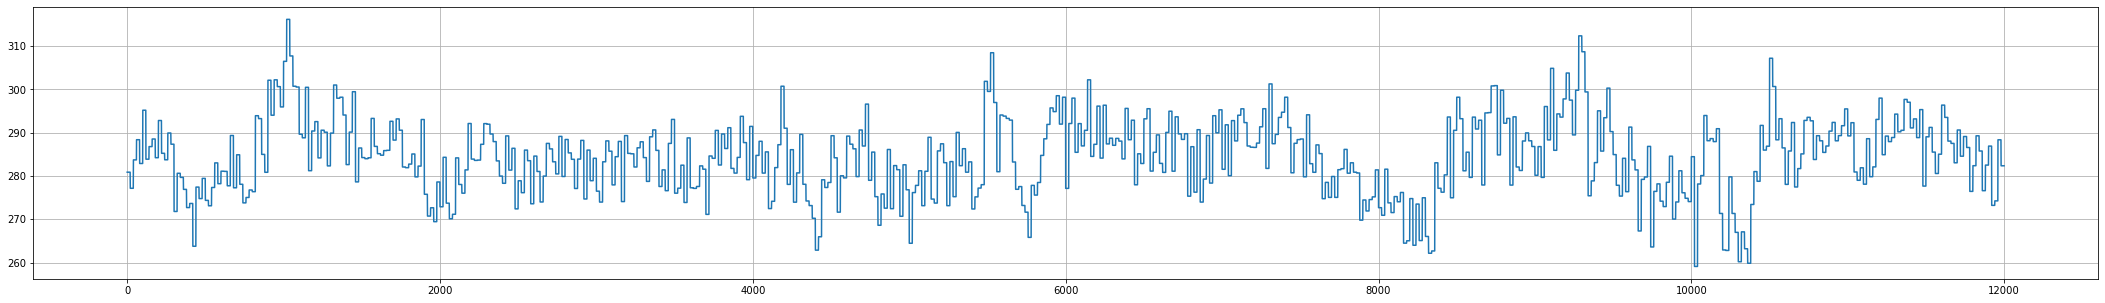

In [64]:
data['Vane_WD_122m'].plot(figsize=(37,5), grid=True)

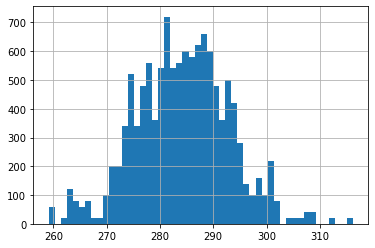

In [65]:
data['Vane_WD_122m'].hist(bins=50)

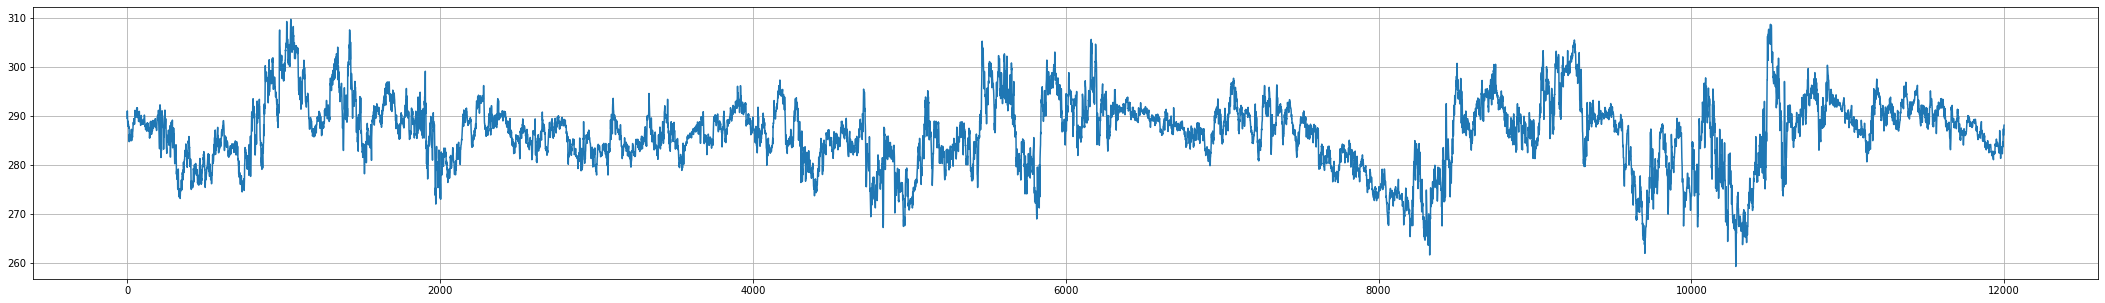

In [66]:
data['Sonic_direction_119m'].plot(figsize=(37,5), grid=True)

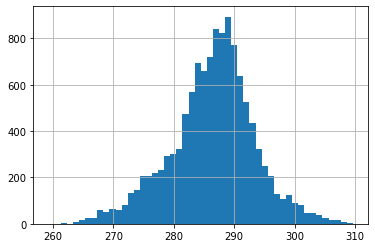

In [67]:
data['Sonic_direction_119m'].hist(bins=50)

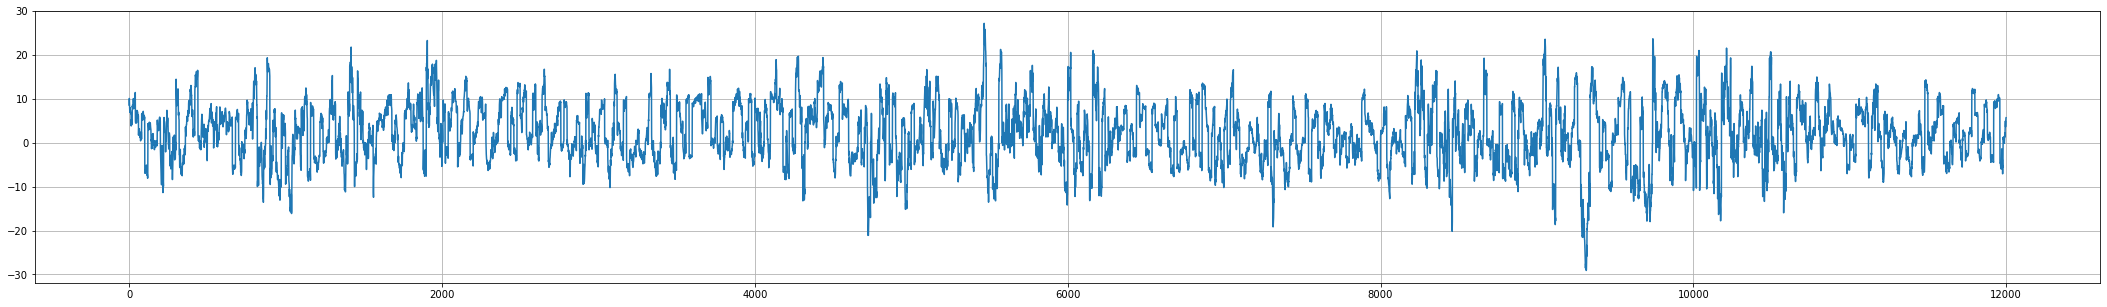

In [68]:
(data['Sonic_direction_119m'] - data['Vane_WD_122m']).plot(figsize=(37,5), grid=True)

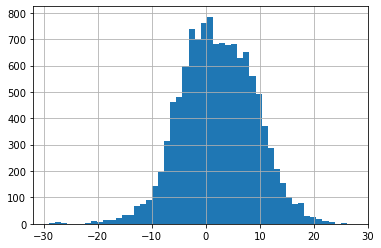

In [69]:
(data['Sonic_direction_119m'] - data['Vane_WD_122m']).hist(bins=50)

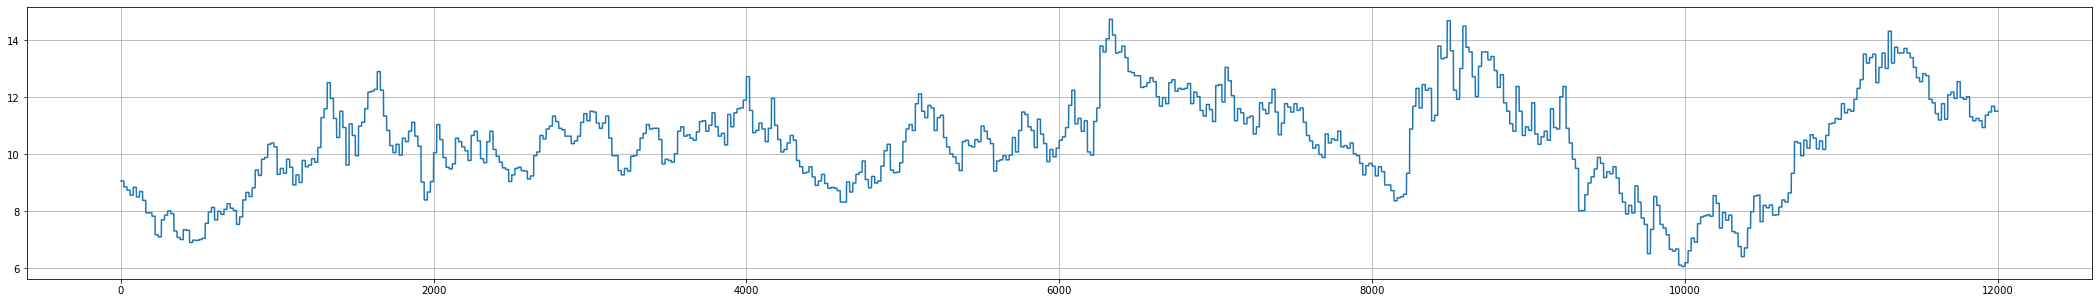

In [70]:
data['Cup_WS_122m'].plot(figsize=(37,5), grid=True)

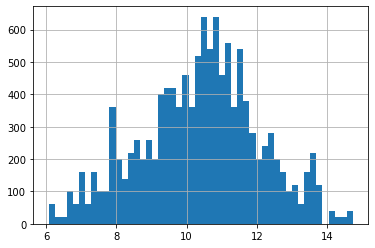

In [71]:
data['Cup_WS_122m'].hist(bins=50)

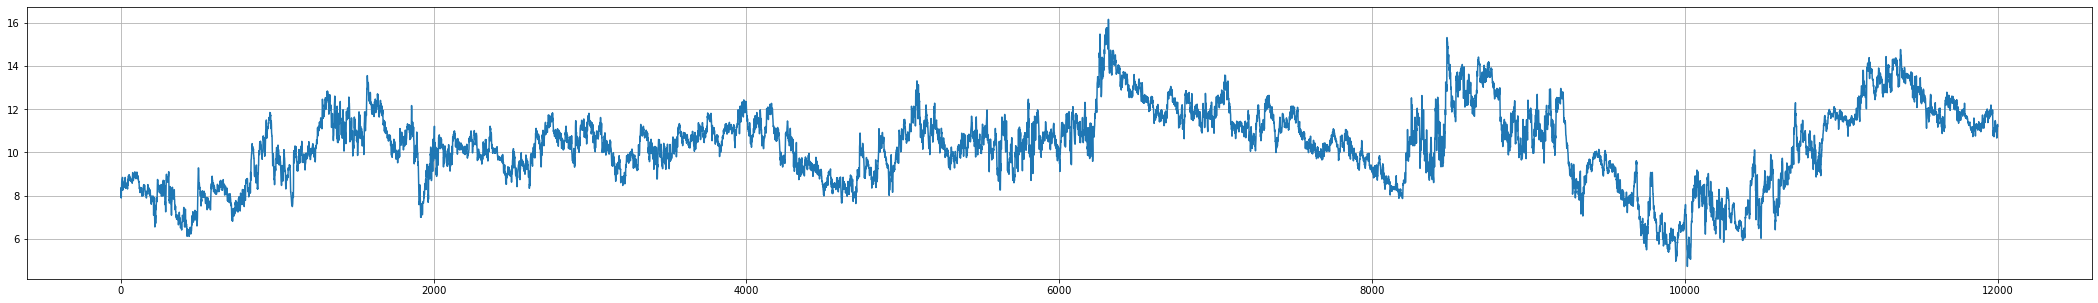

In [72]:
data['Sonic_CupEqHorizSpeed_119m'].plot(figsize=(37,5), grid=True)

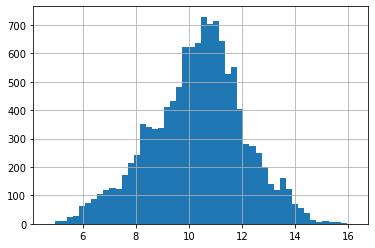

In [73]:
data['Sonic_CupEqHorizSpeed_119m'].hist(bins=50)

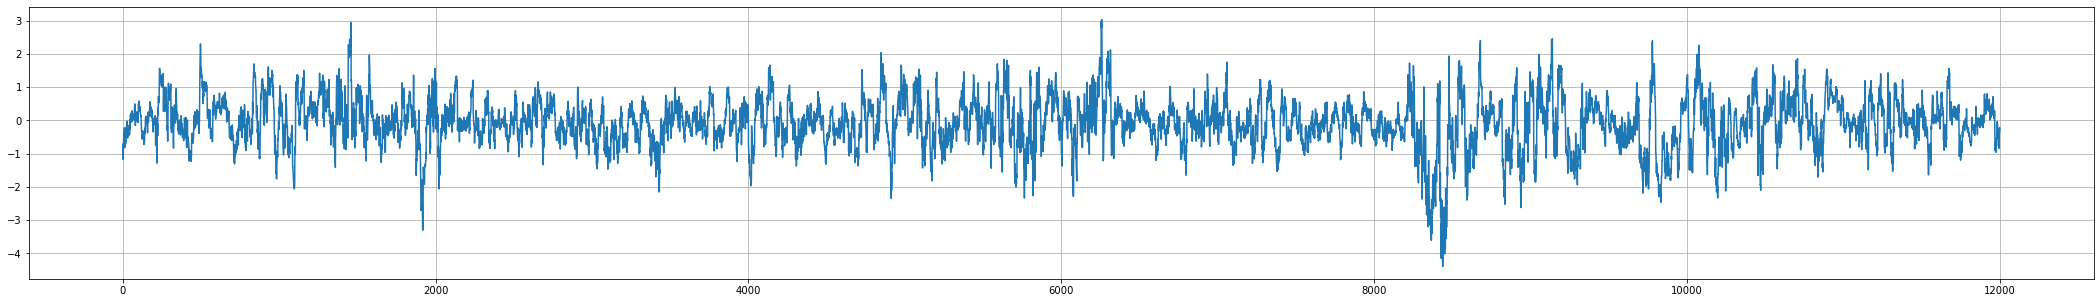

In [74]:
(data['Sonic_CupEqHorizSpeed_119m'] - data['Cup_WS_122m']).plot(figsize=(37,5), grid=True)

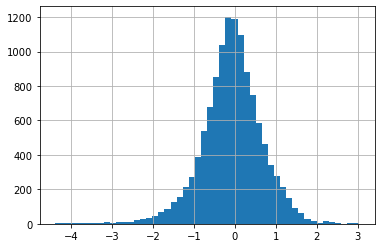

In [75]:
(data['Sonic_CupEqHorizSpeed_119m'] - data['Cup_WS_122m']).hist(bins=50)

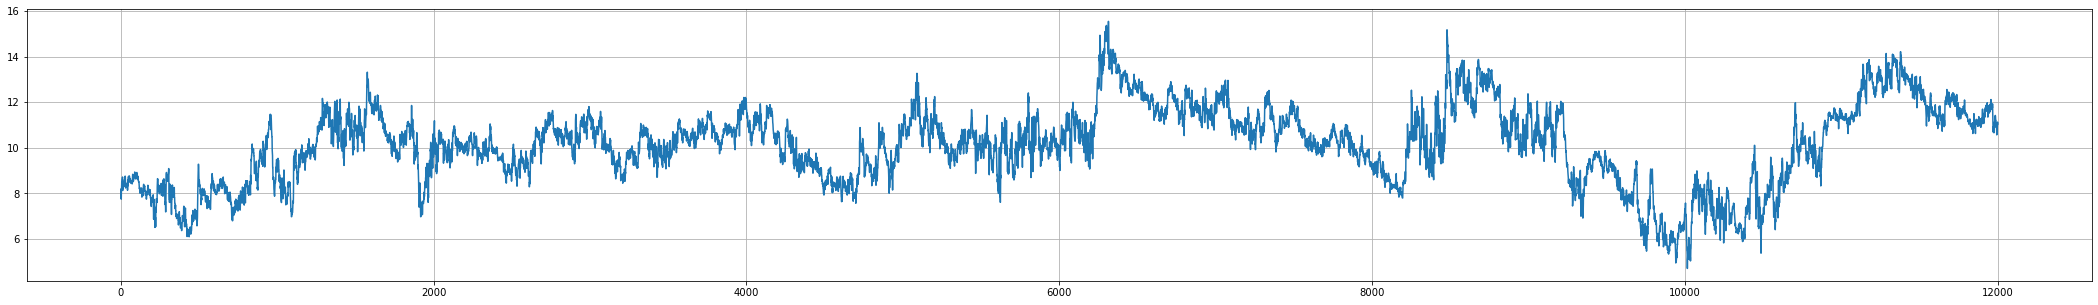

In [76]:
data['Sonic_x_119'].plot(figsize=(37,5), grid=True)

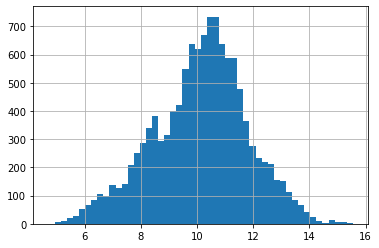

In [77]:
data['Sonic_x_119'].hist(bins=50)

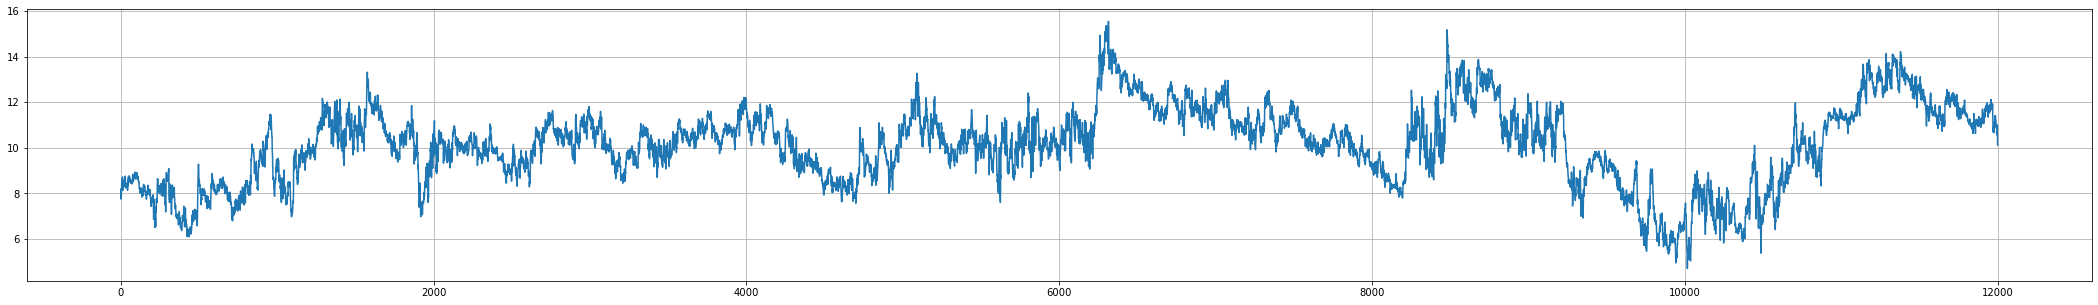

In [78]:
data['Sonic_x_clean_119m'].plot(figsize=(37,5), grid=True)

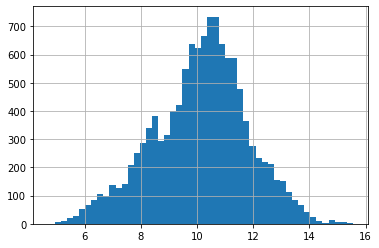

In [79]:
data['Sonic_x_clean_119m'].hist(bins=50)

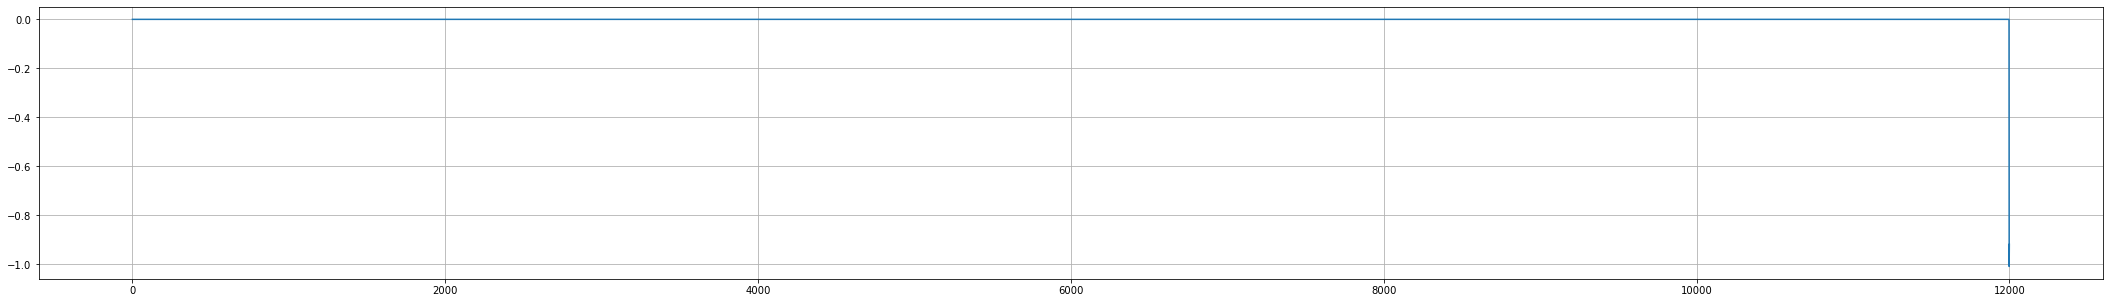

In [80]:
(data['Sonic_x_clean_119m'] - data['Sonic_x_119']).plot(figsize=(37,5), grid=True)

In [81]:
data['Sonic_CupEqHorizSpeed_119m'].pow(3).mean() - data['Sonic_CupEqHorizSpeed_119m'].mean() ** 3

95.21243841754904

In [82]:
data['Sonic_CupEqHorizSpeed_119m'].pow(3).mean()

1193.6765464325981

In [83]:
data['Sonic_CupEqHorizSpeed_119m'].pow(1.5).var()

70.74532889173261

In [270]:
N = data['Sonic_CupEqHorizSpeed_119m'].shape[0]
sample_freq = dfb['tower']['daqfreq'].item()

In [84]:
var = data['Sonic_CupEqHorizSpeed_119m'].pow(2).mean() - data['Sonic_CupEqHorizSpeed_119m'].mean() ** 2
var

3.1098607589407408

In [85]:
var ** 0.5

1.7634797302324574

In [86]:
# TI - will be smaller if computed on 1Hz data
(var ** 0.5) / data['Sonic_CupEqHorizSpeed_119m'].mean()

0.1709130332534277

In [87]:
data['timestamp'].diff().describe()

count                     11999
mean     0 days 00:00:00.050000
std      0 days 00:00:00.000039
min      0 days 00:00:00.049939
25%      0 days 00:00:00.049939
50%      0 days 00:00:00.050025
75%      0 days 00:00:00.050025
max      0 days 00:00:00.050025
Name: timestamp, dtype: object

In [249]:
from scipy.signal import periodogram, welch
import matplotlib.pyplot as plt
from scipy.fft import next_fast_len, rfft, fft
from scipy.integrate import cumtrapz

(1e-06, 1000.0)

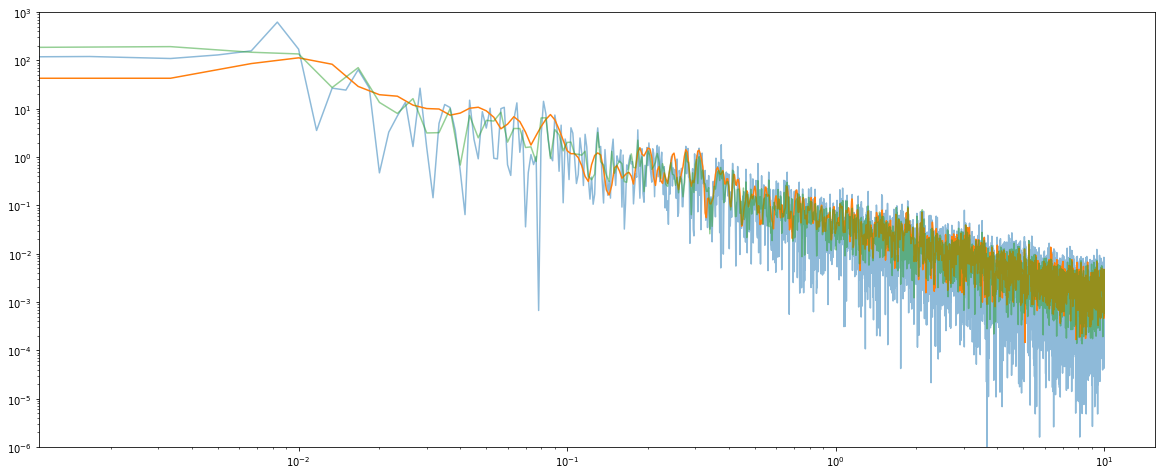

In [530]:
f, psd = periodogram(data['Sonic_CupEqHorizSpeed_119m'], 20, nfft=next_fast_len(N))
f_w, psd_w = welch(data['Sonic_CupEqHorizSpeed_119m'], fs=20, nperseg=300*20, noverlap=150*20, window='flattop')
plt.figure(figsize=(20,8))
plt.loglog(f, psd, alpha=0.5)
plt.loglog(f_w, psd_w)
plt.loglog(*welch(data['Sonic_CupEqHorizSpeed_119m'], fs=20, nperseg=300*20, noverlap=150*20, window='boxcar'), alpha=0.5)
plt.ylim([1e-6, 1e3])

In [528]:
f_w[2]

0.008333333333333333

In [245]:
N / (f_w.shape[0] - 1)

20.0

In [90]:
bin_width = f[1] - f[0]
bin_width

0.0016666666666666668

In [147]:
f_w[1] - f_w[0]

0.016666666666666666

In [166]:
test = pd.DataFrame(data['Sonic_CupEqHorizSpeed_119m'].values, index=data['timestamp'].dt.round('ms'))

In [172]:
test.resample('1min').mean().pow(2).mean() - data['Sonic_CupEqHorizSpeed_119m'].mean()**2

0    1.763647
dtype: float64

In [178]:
test.resample('60s').mean().var()

0    1.959608
dtype: float64

In [285]:
fft_coef = rfft(data['Sonic_CupEqHorizSpeed_119m'].values, norm=None, n=next_fast_len(N))

In [274]:
np.abs(fft_coef)

array([1.23815934e+05, 3.80390534e+03, 3.62760039e+03, ...,
       2.26784222e+00, 1.75307843e+01, 1.84576144e+01])

first term of FFT is integral of timeseries. When norm='ortho', everything is scaled by norm factor N^(-1/2)

So don't include this in psd calcs: (sum of windspeed)^2 is not meaningful

In [278]:
test.sum() # / np.sqrt(N)

0    123815.933519
dtype: float64

In [286]:
psd_fft = np.power(np.absolute(fft_coef), 2) / sample_freq # divide by sample freq to get density per Hz

Have to correct for one-sidedness (2x power/energy coefs, except DC and Nyquist) See [here](https://www.reddit.com/r/matlab/comments/4cqa10/fft_dc_component_scaling/) for explanation. If N is even, the last rfft term is the Nyquist freq, which shouldn't be doubled (symmetrical around it)

In [287]:
if N % 2: # odd
    psd_fft[1:] = psd_fft[1:] * 2
else: # even
    psd_fft[1:-1] = psd_fft[1:-1] * 2

In [288]:
psd_fft[0]

766519269.655627

In [341]:
psd_fft[0] = 0 # erase meaningless term to fix downstream cumulative sum

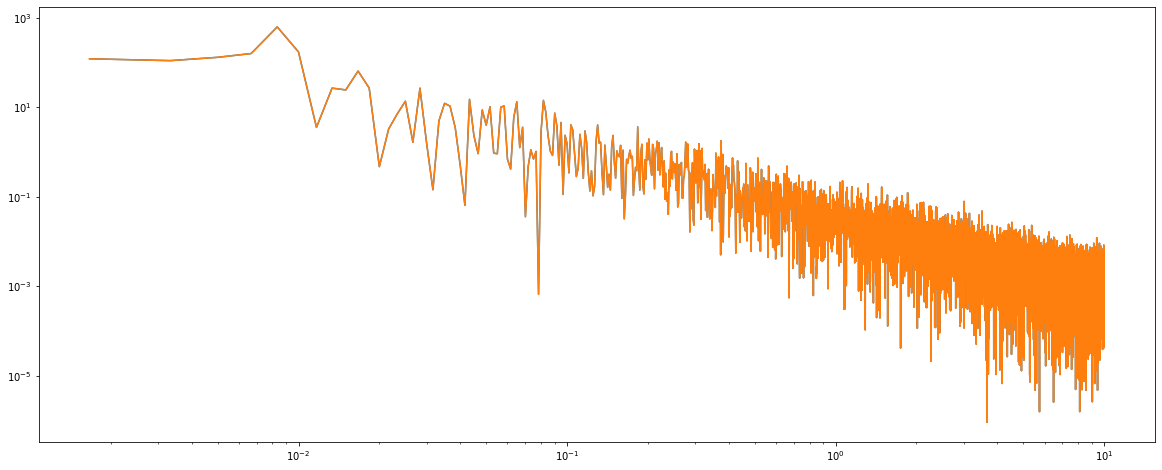

In [289]:
plt.figure(figsize=(20,8))
plt.loglog(f[1:], psd_fft[1:] / N) # difference of factor of N (12000). Removed if norm='ortho'
plt.loglog(f[1:], psd[1:])

In [356]:
np.max(np.abs(psd[1:] / psd_fft[1:] * N))

1.000000000000261

In [148]:
cumulative = cumtrapz(psd, dx=bin_width) # trapezoidal integration
cum_w = cumtrapz(psd_w, dx=(f_w[1] - f_w[0]))

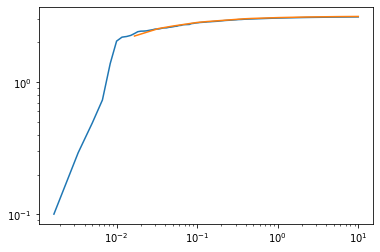

In [180]:
plt.loglog(f[1:], cumulative)
plt.loglog(f_w[1:], cum_w + test.resample('60s').mean().var().values) # have to add energy from freqs below resolution

In [175]:
total = np.sqrt(cumulative[-1]) # matches std_dev
total

1.7634793948361793

In [94]:
(cumulative[-1])

3.109859576011777

In [485]:
# TOTAL energy diff by different methods
difference = cumulative[-1] - (cum_w[-1] + test.resample('60s').mean().var().values)
difference, f'{(difference / cumulative[-1] * 100)[0]:.3f}%'

(array([-0.02618903]), '-0.842%')

What fraction of variation is caused by freqs up to a cutoff value?

In [502]:
cutoff = 1 / 30 # 1 / num_seconds
cutoff_index = int(cutoff // bin_width)
cumulative[cutoff_index] / test.var()[0]

0.8108780457944111

In [482]:
f[1:][cutoff_index], cutoff

(0.016666666666666666, 0.016666666666666666)

In [484]:
# CUTOFF energy diff by different methods
difference = cumulative[cutoff_index] - (cum_w[0] + test.resample('60s').mean().var().values[0])
difference, f'{(difference / cumulative[cutoff_index] * 100):.3f}%'

(0.09907888001331777, '4.255%')

# How get spectral density of x^3?

In [385]:
np.allclose(rfft(data['Sonic_CupEqHorizSpeed_119m'].values, norm='ortho', n=next_fast_len(N)),
            rfft(data['Sonic_CupEqHorizSpeed_119m'].values, norm=None, n=next_fast_len(N)) / np.sqrt(N)
           )

True

In [436]:
fft_coef_2 = rfft(data['Sonic_CupEqHorizSpeed_119m'].values, norm='ortho', n=next_fast_len(N)) #/ np.sqrt(N)

In [437]:
np.absolute(fft_coef_2)

array([1.13027966e+03, 3.47247460e+01, 3.31153094e+01, ...,
       2.07024724e-02, 1.60033433e-01, 1.68494196e-01])

In [455]:
psd_fft_2 = np.power(np.absolute(fft_coef_2), 3) / sample_freq / np.sqrt(2) # not sure where the 1/root(2) comes from but it makes it work

In [456]:
if N % 2: # odd
    print('odd')
    psd_fft_2[1:] = psd_fft_2[1:] * 2
else: # even
    print('even')
    psd_fft_2[1:-1] = psd_fft_2[1:-1] * 2

even


In [457]:
psd_fft_2[0]

51051998.36098648

In [458]:
psd_fft_2[0] = 0 # erase meaningless term to fix downstream cumulative sum

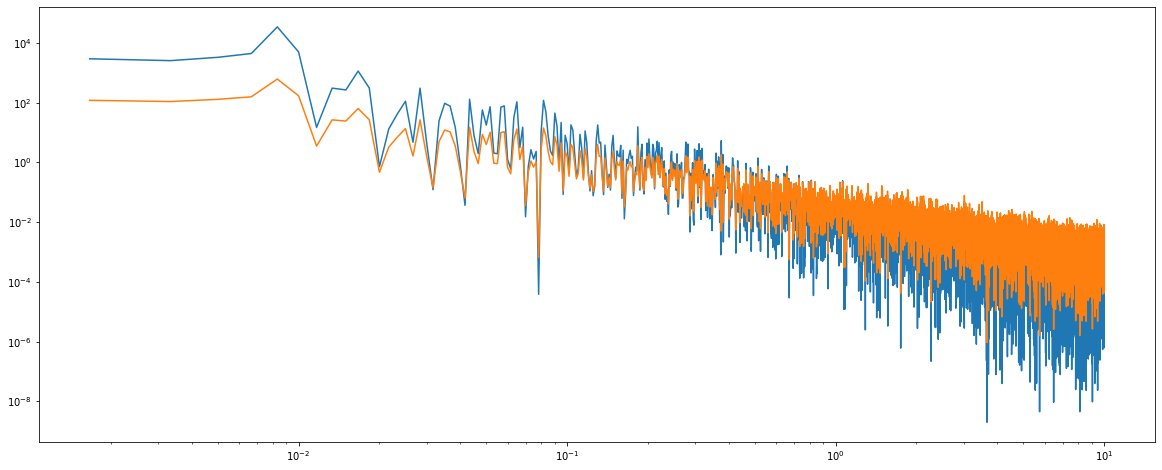

In [459]:
plt.figure(figsize=(20,8))
plt.loglog(f[1:], psd_fft_2[1:])
plt.loglog(f[1:], psd[1:])
#plt.ylim([1e-6, 1e3])

In [460]:
cubed_cum = cumtrapz(psd_fft_2, dx=bin_width)

In [461]:
cubed_cum[-1]

94.79060429829555

In [462]:
psd_fft_2.sum() * bin_width

94.79060443923404

In [463]:
cubed_cum[0]

2.467294496467133

In [464]:
mean_cube = data['Sonic_CupEqHorizSpeed_119m'].pow(3).mean()

In [465]:
cubed_cum[-1] / (mean_cube - data['Sonic_CupEqHorizSpeed_119m'].mean() ** 3)

0.995569548199117

In [466]:
(mean_cube - data['Sonic_CupEqHorizSpeed_119m'].mean() ** 3) / cubed_cum[-1]

1.0044501680559608

In [473]:
cutoff = 1 / 60 # 1 / num_seconds
cutoff_index = int(cutoff // bin_width)
cubed_cum[cutoff_index]

90.11445036116142

In [486]:
f[1:][cutoff_index], cutoff

(0.016666666666666666, 0.016666666666666666)

In [487]:
# CUTOFF cube diff by different methods
difference = cubed_cum[cutoff_index] - (test.resample('60s').mean().pow(3).mean().values[0] - test.mean()[0]**3)
difference, f'{(difference / cubed_cum[cutoff_index] * 100):.3f}%'

(36.65709045216171, '40.678%')

In [469]:
(test.resample('60s').mean().pow(3).mean().values[0] - test.mean()[0]**3)

53.457359908999706

In [434]:
test.resample('60s').mean().pow(3).mean().values[0]

1151.9214679240488

In [435]:
cubed_cum[0]

3.4892813392723157

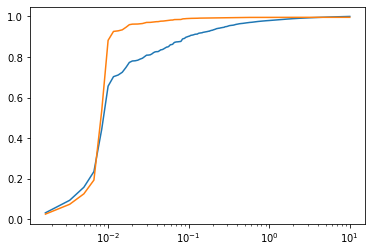

In [494]:
plt.semilogx(f[1:], cumulative / test.var()[0])
plt.semilogx(f[1:], cubed_cum / (test.pow(3).mean()[0] - test.mean()[0]**3))

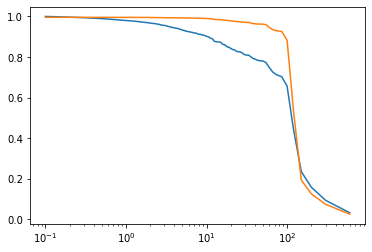

In [498]:
plt.semilogx(1/f[1:], cumulative / test.var()[0])
plt.semilogx(1/f[1:], cubed_cum / (test.pow(3).mean()[0] - test.mean()[0]**3))

In [495]:
test.pow(3).mean()[0]

1193.6765464325981

In [496]:
test.mean()[0]**3

1098.464108015049

In [497]:
test.resample('60s').mean().pow(3).mean().values[0]

1151.9214679240488